# Generate Synthetic Data

Since we don't have access to the actual dataset used in the journal, we replicate the variables that were mentioned.

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(69)

# Number of patients
n_patients = 400

# Generate enrollment time in months
enrollment_time = np.random.randint(0, 12, size=n_patients)

# Define possible time points for treatment (e.g., after 3 months, 6 months, etc.)
time_points = np.arange(3, 25, 3)  # Possible treatment times from 3 months to 24 months

# Baseline symptoms (Pain, Urgency, Frequency)
# Pain and Urgency: 0-9, Frequency: 0-20
baseline_symptoms = np.column_stack([
    np.random.randint(0, 10, size=n_patients),  # Pain (0-9)
    np.random.randint(0, 10, size=n_patients),  # Urgency (0-9)
    np.random.randint(0, 21, size=n_patients)   # Frequency (0-20)
])

# Generate the "treated" and "treatment time"
treated_indicator = np.zeros(n_patients)  # Initialize all as untreated
treatment_time = np.full(n_patients, np.inf)  # Initialize with np.inf (for untreated patients)

# Simulate simple treatment decision: randomized treatment probability
for i in range(n_patients):
    treat_prob = np.random.uniform(0.1, 0.5)
    # Flip a coin based on the treatment probability (binomial distribution)
    treated = np.random.binomial(1, treat_prob)
    treated_indicator[i] = treated
    
    # If treated, assign a treatment time randomly from the available time points (excluding the first and last)
    if treated:
        treatment_time[i] = np.random.choice(time_points[1:-1])

# Symptoms post-treatment (fluctuate slightly from baseline)
treatment_symptoms = baseline_symptoms + np.random.randint(-2, 2, size=(n_patients, 3))

# Enforce bounds for Pain and Urgency (0-9), Frequency (0-20)
treatment_symptoms[:, 0] = np.clip(treatment_symptoms[:, 0], 0, 9)  # Pain
treatment_symptoms[:, 1] = np.clip(treatment_symptoms[:, 1], 0, 9)  # Urgency
treatment_symptoms[:, 2] = np.clip(treatment_symptoms[:, 2], 0, 20) # Frequency

# Follow-up symptoms
symptoms_3m = treatment_symptoms + np.random.randint(-2, 2, size=(n_patients, 3))
symptoms_3m[:, 0] = np.clip(symptoms_3m[:, 0], 0, 9)  # Pain
symptoms_3m[:, 1] = np.clip(symptoms_3m[:, 1], 0, 9)  # Urgency
symptoms_3m[:, 2] = np.clip(symptoms_3m[:, 2], 0, 20) # Frequency

symptoms_6m = symptoms_3m + np.random.randint(-2, 2, size=(n_patients, 3))
symptoms_6m[:, 0] = np.clip(symptoms_6m[:, 0], 0, 9)  # Pain
symptoms_6m[:, 1] = np.clip(symptoms_6m[:, 1], 0, 9)  # Urgency
symptoms_6m[:, 2] = np.clip(symptoms_6m[:, 2], 0, 20) # Frequency

# For the 3-month frequency:
improvement_3m = np.where(treated_indicator == 1, np.random.binomial(1, 0.6, size=n_patients), 0)
# Subtract the additional improvement and re-clip to maintain bounds
symptoms_3m[:, 2] = np.clip(symptoms_3m[:, 2] - improvement_3m, 0, 20)

# For the 6-month frequency:
improvement_6m = np.where(treated_indicator == 1, np.random.binomial(1, 0.6, size=n_patients), 0)
symptoms_6m[:, 2] = np.clip(symptoms_6m[:, 2] - improvement_6m, 0, 20)

# Gender (0 = Female, 1 = Male)
gender = np.random.choice([0, 1], size=n_patients)

# Create DataFrame
df = pd.DataFrame({
    'Patient_ID': np.arange(1, n_patients + 1),
    'Enrollment_Time': enrollment_time,
    'Treatment_Time': treatment_time,
    'Treated': treated_indicator,
    'base_pain': baseline_symptoms[:, 0],
    'base_urgency': baseline_symptoms[:, 1],
    'base_frequency': baseline_symptoms[:, 2],
    'treatment_pain': treatment_symptoms[:, 0],
    'treatment_urgency': treatment_symptoms[:, 1],
    'treatment_frequency': treatment_symptoms[:, 2],
    'Pain_3M': symptoms_3m[:, 0],
    'Urgency_3M': symptoms_3m[:, 1],
    'Frequency_3M': symptoms_3m[:, 2],
    'Pain_6M': symptoms_6m[:, 0],
    'Urgency_6M': symptoms_6m[:, 1],
    'Frequency_6M': symptoms_6m[:, 2],
    'Gender': gender
})

df.head(20)


,Patient_ID,Enrollment_Time,Treatment_Time,Treated,base_pain,base_urgency,base_frequency,treatment_pain,treatment_urgency,treatment_frequency,Pain_3M,Urgency_3M,Frequency_3M,Pain_6M,Urgency_6M,Frequency_6M,Gender
0,1,6,inf,0.0,0,2,15,0,2,13,0,3,12,0,3,11,1
1,2,11,inf,0.0,1,5,14,0,4,12,0,2,10,0,3,9,1
2,3,9,inf,0.0,6,4,16,4,4,15,4,5,16,3,6,14,0
3,4,11,inf,0.0,5,5,15,5,6,16,4,4,14,2,4,15,1
4,5,10,inf,0.0,7,5,5,8,5,6,6,5,5,5,5,6,0
5,6,7,inf,0.0,1,4,0,0,2,0,1,3,0,1,4,0,1
6,7,4,inf,0.0,6,1,18,5,1,19,5,1,20,3,0,18,0
7,8,1,inf,0.0,8,6,19,9,5,17,8,6,18,6,4,17,1
8,9,6,6.0,1.0,1,7,1,0,6,2,0,6,0,0,6,0,1
9,10,9,inf,0.0,5,1,2,5,2,1,5,2,0,6,1,1,1


In [2]:
df["Treated"].value_counts()

Treated
0.0    290
1.0    110
Name: count, dtype: int64

# Matching by Minimum Cost Flow in a Network

Since we don't have access to the actual dataset used in the journal, we replicate the variables that were mentioned.

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis

# --------- STEP 1: Risk-Set Matching via Minimum Cost Flow ---------
# We want to match treated subjects to “not-yet-treated” controls.
# Eligible control q for a treated subject p must satisfy: 
#   df.loc[q, 'Treatment_Time'] > df.loc[p, 'Treatment_Time']
#
# The distance for each eligible pair is the Mahalanobis distance
# computed on the 6-dimensional covariate: 
#   [base_pain, base_urgency, base_frequency, treatment_pain, treatment_urgency, treatment_frequency]

# First, compute the 6-dimensional covariate matrix for all subjects.
covariate_cols = ['base_pain', 'base_urgency', 'base_frequency',
                  'treatment_pain', 'treatment_urgency', 'treatment_frequency']
X = df[covariate_cols].values

# Compute the empirical covariance matrix and its inverse.
cov_matrix = np.cov(X, rowvar=False)
# Use pseudo-inverse in case the covariance matrix is nearly singular.
inv_cov_matrix = np.linalg.pinv(cov_matrix)

# Identify indices of treated subjects (those who eventually receive treatment)
treated_idx = df.index[df['Treated'] == 1].tolist()
# Identify controls: those who are never treated (Treatment_Time == np.inf)
# or treated later (i.e. Treatment_Time greater than a given treated subject’s treatment time).
# (We will check eligibility for each treated subject individually.)

# Create the directed graph for minimum cost flow.
G = nx.DiGraph()

# We will create nodes for each treated subject and for each control subject.
# To control the overall number of matches, we add a super-source and super-sink,
# and we set the overall supply to S (100 matched pairs).
S = 100  # desired number of pairs

# Add super-source and super-sink nodes with appropriate supply/demand.
G.add_node('source', demand=-S)   # supply of S (negative demand)
G.add_node('sink', demand=S)        # sink with demand S

# For each treated subject, add a node and an edge from source.
# We'll label these nodes as "treated_{i}" where i is the DataFrame index.
for i in treated_idx:
    # Only add treated subjects that have at least one eligible control.
    # (We will check eligibility when adding edges.)
    node_name = f"treated_{i}"
    G.add_node(node_name)
    G.add_edge('source', node_name, capacity=1, weight=0)

# For potential control subjects, we add a node for each subject (even if they were later treated).
# (They are eligible as controls for some treated subjects if they have not yet been treated.)
all_control_idx = df.index.tolist()
for j in all_control_idx:
    node_name = f"control_{j}"
    G.add_node(node_name)
    G.add_edge(node_name, 'sink', capacity=1, weight=0)

# Now add edges from each treated subject to each eligible control.
# The cost (weight) on the edge is the Mahalanobis distance (scaled to an integer).
# We multiply by 1000 and round to convert the float to an integer (required by min_cost_flow).
scale_factor = 1000

for i in treated_idx:
    treated_time = df.loc[i, 'Treatment_Time']
    x_treated = df.loc[i, covariate_cols].values
    treated_node = f"treated_{i}"
    
    # For each potential control subject, check eligibility.
    for j in all_control_idx:
        # A control is eligible if its treatment time is strictly later than the treated subject’s time.
        # (Note: untreated subjects have Treatment_Time == np.inf and are eligible.)
        if df.loc[j, 'Treatment_Time'] > treated_time:
            x_control = df.loc[j, covariate_cols].values
            # Compute the Mahalanobis distance.
            diff = x_treated - x_control
            d = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff))
            cost = int(np.round(d * scale_factor))
            control_node = f"control_{j}"
            # Add an edge with capacity 1 and the computed cost.
            G.add_edge(treated_node, control_node, capacity=1, weight=cost)

# Solve the minimum cost flow problem.
flowDict = nx.min_cost_flow(G)

# Extract the matched pairs from the flow.
matched_pairs = []
# For each treated subject node, check which control received flow.
for i in treated_idx:
    treated_node = f"treated_{i}"
    for nbr, flow in flowDict[treated_node].items():
        if flow > 0:
            # nbr is of the form "control_{j}"
            j = int(nbr.split('_')[1])
            matched_pairs.append((i, j))
            
# In case there are more than S pairs (or less, if not enough eligible matches exist),
# we take the first S pairs.
matched_pairs = matched_pairs[:S]

print(f"Number of matched pairs found: {len(matched_pairs)}")

Number of matched pairs found: 100


In [4]:
import pandas as pd
import numpy as np

# --------- STEP 2: Prepare Data for Graphical Representation ---------
# For each matched pair (treated, control), we want to plot for each variable (pain, urgency, frequency):
#  1. Baseline value: base_{var}
#  2. Value at treatment: treatment_{var}
#  3. Outcome at 3 months: {Var}_3M
#  4. Outcome at 6 months: {Var}_6M
#  5. Difference (3 mos posttreatment): (3M - average of baseline and treatment) difference (treated minus control)
#  6. Difference (6 mos posttreatment): (6M - average of baseline and treatment) difference (treated minus control)
#
# We build a long-form DataFrame with one row per observation.
# For the first four timepoints, we record separate values for the treated and control subjects.
# For the two difference timepoints, we record one contrast value per pair.

def extract_measurements(pair_list, variable, timepoint):
    vals = []
    for i, j in pair_list:
        if timepoint in ['change_3M', 'change_6M']:
            # Compute pre-treatment averages for treated and control
            treated_pretreat_avg = (df.loc[i, f'base_{variable}'] + df.loc[i, f'treatment_{variable}']) / 2.0
            control_pretreat_avg = (df.loc[j, f'base_{variable}'] + df.loc[j, f'treatment_{variable}']) / 2.0

            # Get post-treatment values
            post_treatment_tp = f"{variable.capitalize()}_{timepoint[-2:]}"
            treated_post = df.loc[i, post_treatment_tp]
            control_post = df.loc[j, post_treatment_tp]

            # Compute differences from pre-treatment average
            treated_diff = treated_post - treated_pretreat_avg
            control_diff = control_post - control_pretreat_avg

            # Store treated and control differences (not just the contrast)
            vals.append((treated_diff, control_diff))
        else:
            # Standard case for baseline, treatment, 3M, and 6M values
            column_mapping = {
                'baseline': f'base_{variable}',
                'treatment': f'treatment_{variable}',
                '3M': f'{variable.capitalize()}_3M',
                '6M': f'{variable.capitalize()}_6M'
            }
            column_name = column_mapping.get(timepoint)
            vals.append((df.loc[i, column_name], df.loc[j, column_name]))
    
    return np.array(vals)

# Define the variables and time points for plotting.
variables = ['pain', 'urgency', 'frequency']
timepoints = ['baseline', 'treatment', '3M', '6M', 'change_3M', 'change_6M']
timepoint_labels = {
    'baseline': 'Baseline',
    'treatment': 'At Treatment',
    '3M': '3 Months after Treatment',
    '6M': '6 Months after Treatment',
    'change_3M': 'Difference (3 mos posttreatment)',
    'change_6M': 'Difference (6 mos posttreatment)'
}

# Build a long-form DataFrame.
plot_data = []
for var in variables:
    for tp in timepoints:
        measurements = extract_measurements(matched_pairs, var, tp)
        if tp in ['change_3M', 'change_6M']:
            # Store treated and control differences
            for idx in range(measurements.shape[0]):
                plot_data.append({
                    'Variable': var.capitalize(),
                    'TimePoint': timepoint_labels[tp],
                    'Group': 'Treated',
                    'Value': measurements[idx, 0]  # Treated difference
                })
                plot_data.append({
                    'Variable': var.capitalize(),
                    'TimePoint': timepoint_labels[tp],
                    'Group': 'Never/Later Treated',
                    'Value': measurements[idx, 1]  # Control difference
                })
        else:
            # Store standard Treated and Control values
            for idx in range(measurements.shape[0]):
                plot_data.append({
                    'Variable': var.capitalize(),
                    'TimePoint': timepoint_labels[tp],
                    'Group': 'Treated',
                    'Value': measurements[idx, 0]
                })
                plot_data.append({
                    'Variable': var.capitalize(),
                    'TimePoint': timepoint_labels[tp],
                    'Group': 'Never/Later Treated',
                    'Value': measurements[idx, 1]
                })

plot_df = pd.DataFrame(plot_data)

# (Optional) Inspect the first few rows
print(plot_df.head(15))


   Variable TimePoint                Group  Value
0      Pain  Baseline              Treated    1.0
1      Pain  Baseline  Never/Later Treated    1.0
2      Pain  Baseline              Treated    2.0
3      Pain  Baseline  Never/Later Treated    2.0
4      Pain  Baseline              Treated    4.0
5      Pain  Baseline  Never/Later Treated    4.0
6      Pain  Baseline              Treated    9.0
7      Pain  Baseline  Never/Later Treated    9.0
8      Pain  Baseline              Treated    4.0
9      Pain  Baseline  Never/Later Treated    5.0
10     Pain  Baseline              Treated    2.0
11     Pain  Baseline  Never/Later Treated    1.0
12     Pain  Baseline              Treated    1.0
13     Pain  Baseline  Never/Later Treated    0.0
14     Pain  Baseline              Treated    9.0


# Graphical Representation

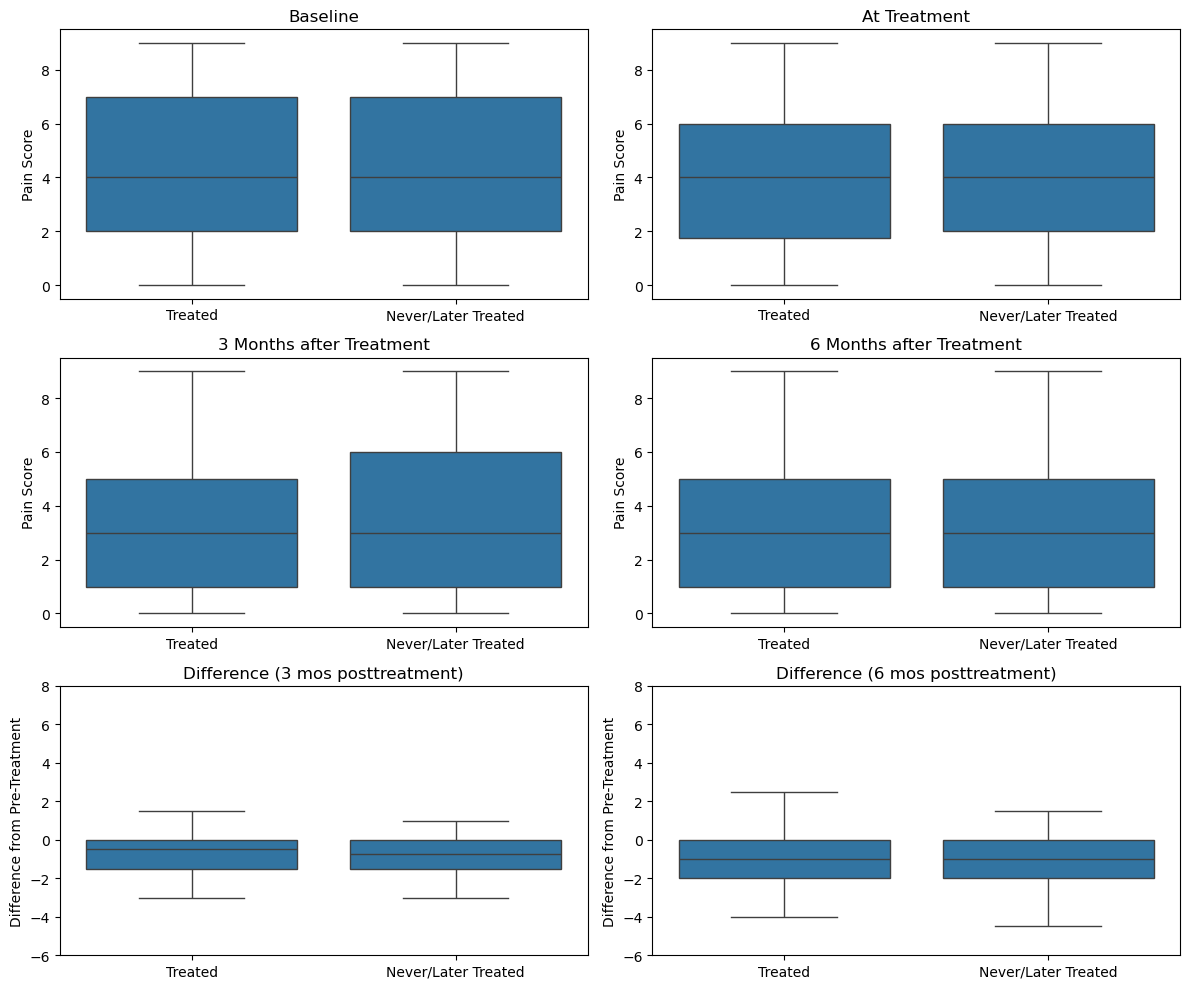

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'pain'
pain_data = plot_df[plot_df['Variable'] == variable.capitalize()]

# Create a 3x2 figure (6 subplots total)
fig, axes = plt.subplots(3, 2, figsize=(4*3, 5*2), sharey=False)
axes = axes.flatten()

# First 4 timepoints (Pain/Urgency: 0-9, Frequency: 0-20)
timepoints_main = pain_data['TimePoint'].unique()[:4]
for j, tp in enumerate(timepoints_main):
    ax = axes[j]
    subdata = pain_data[pain_data['TimePoint'] == tp]
    sns.boxplot(x='Group', y='Value', data=subdata, ax=ax)
    ax.set_title(f"{tp}")
    ax.set_xlabel("")
    ax.set_ylabel("Pain Score")
    ax.set_ylim(-0.5, 9.5)  # Fix: Set y-axis to 0-9 for Pain

# Last 2 timepoints (contrast differences)
timepoints_diff = pain_data['TimePoint'].unique()[-2:]
for j, tp in enumerate(timepoints_diff, start=4):
    ax = axes[j]
    subdata = pain_data[pain_data['TimePoint'] == tp]
    sns.boxplot(x='Group', y='Value', data=subdata, ax=ax)
    ax.set_title(f"{tp}")
    ax.set_xlabel("")
    ax.set_ylabel("Difference from Pre-Treatment")
    ax.set_ylim(-6, 8)  # Adjust based on your data

# Hide unused subplots (if any)
for j in range(len(timepoints_main) + len(timepoints_diff), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

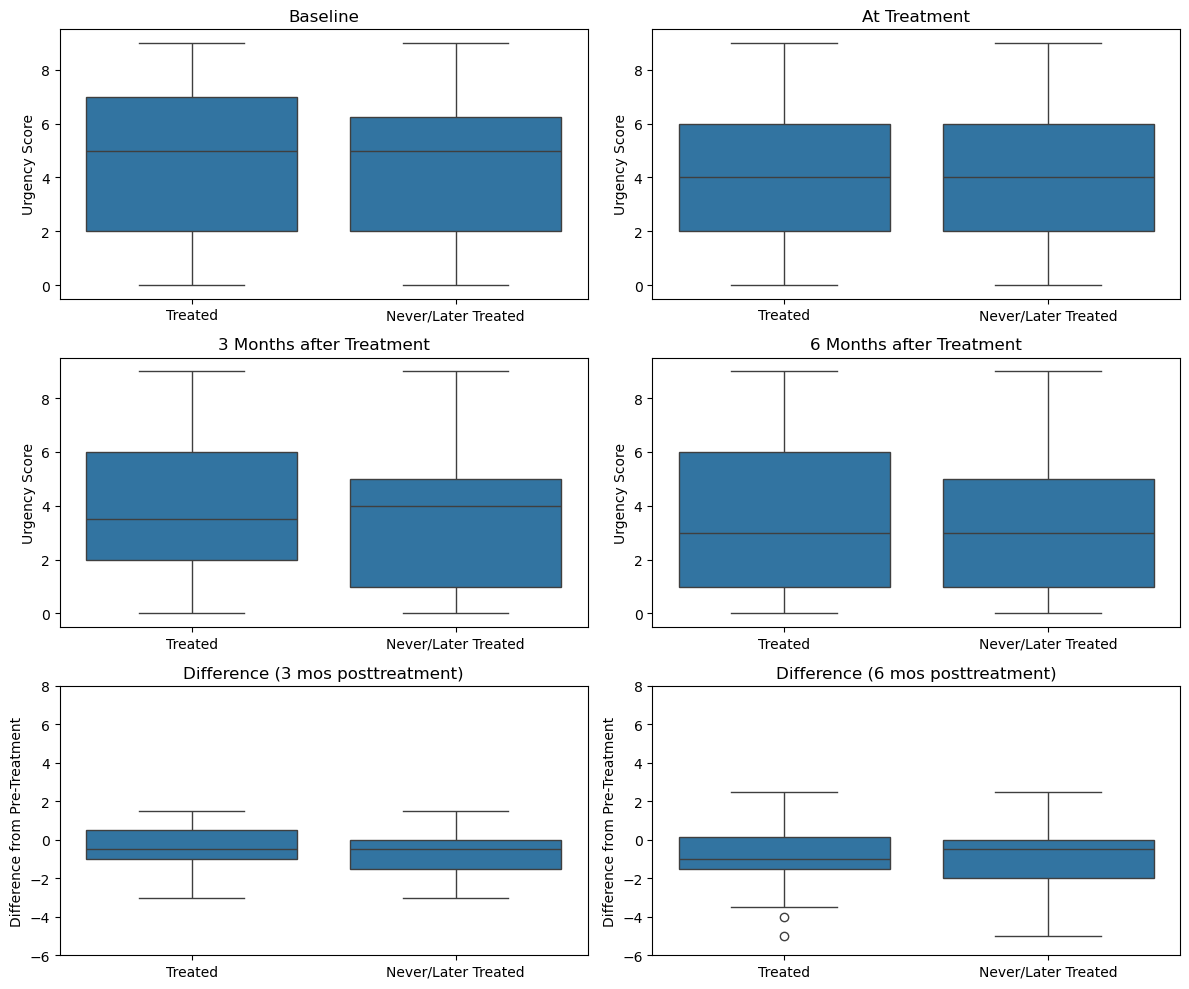

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'urgency'
pain_data = plot_df[plot_df['Variable'] == variable.capitalize()]

# Create a 3x2 figure (6 subplots total)
fig, axes = plt.subplots(3, 2, figsize=(4*3, 5*2), sharey=False)
axes = axes.flatten()

# First 4 timepoints (Pain/Urgency: 0-9, Frequency: 0-20)
timepoints_main = pain_data['TimePoint'].unique()[:4]
for j, tp in enumerate(timepoints_main):
    ax = axes[j]
    subdata = pain_data[pain_data['TimePoint'] == tp]
    sns.boxplot(x='Group', y='Value', data=subdata, ax=ax)
    ax.set_title(f"{tp}")
    ax.set_xlabel("")
    ax.set_ylabel("Urgency Score")
    ax.set_ylim(-0.5, 9.5)  # Fix: Set y-axis to 0-9 for Pain

# Last 2 timepoints (contrast differences)
timepoints_diff = pain_data['TimePoint'].unique()[-2:]
for j, tp in enumerate(timepoints_diff, start=4):
    ax = axes[j]
    subdata = pain_data[pain_data['TimePoint'] == tp]
    sns.boxplot(x='Group', y='Value', data=subdata, ax=ax)
    ax.set_title(f"{tp}")
    ax.set_xlabel("")
    ax.set_ylabel("Difference from Pre-Treatment")
    ax.set_ylim(-6, 8)  # Adjust based on your data

# Hide unused subplots (if any)
for j in range(len(timepoints_main) + len(timepoints_diff), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

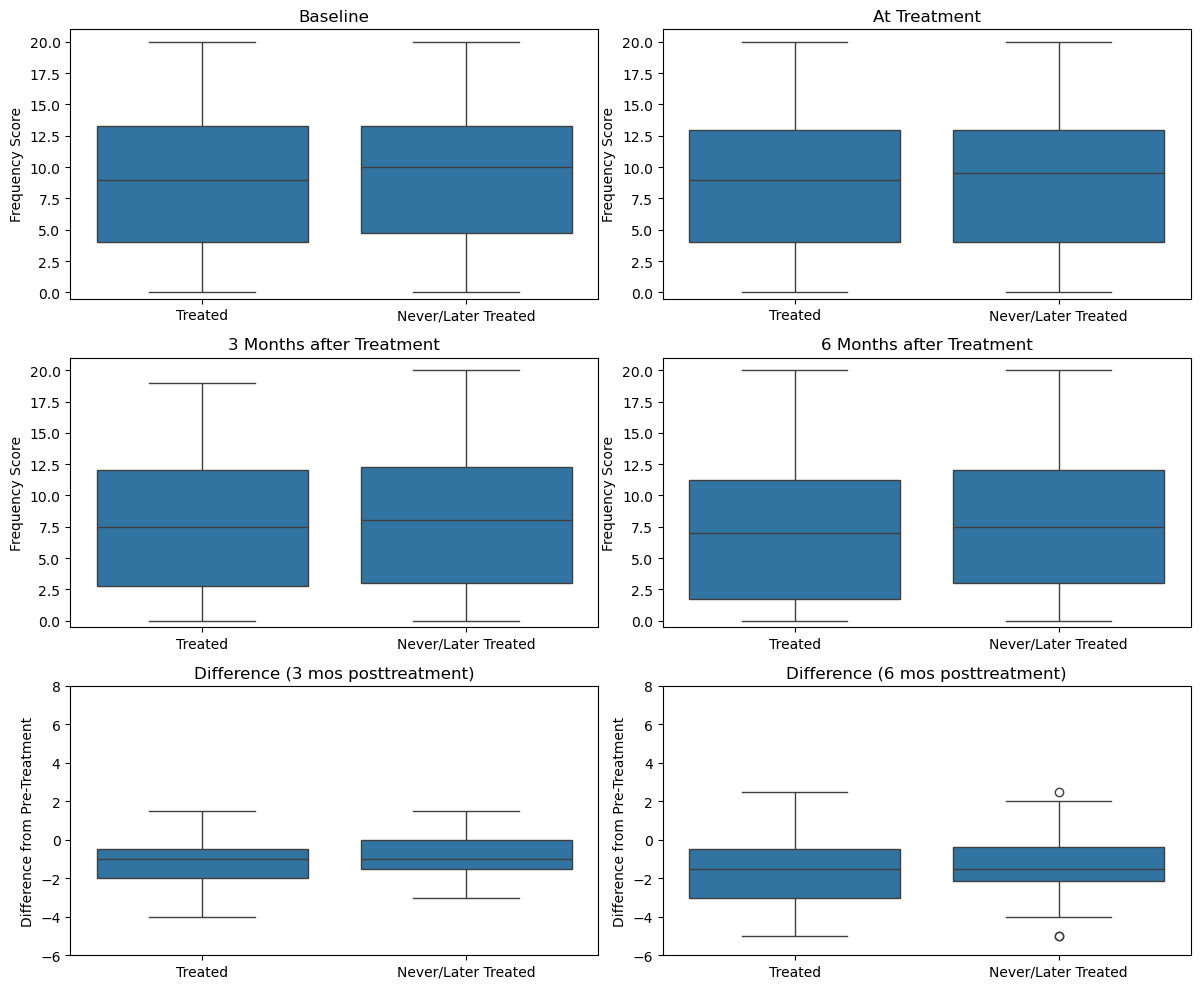

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'frequency'
pain_data = plot_df[plot_df['Variable'] == variable.capitalize()]

# Create a 3x2 figure (6 subplots total)
fig, axes = plt.subplots(3, 2, figsize=(4*3, 5*2), sharey=False)
axes = axes.flatten()

# First 4 timepoints (Pain/Urgency: 0-9, Frequency: 0-20)
timepoints_main = pain_data['TimePoint'].unique()[:4]
for j, tp in enumerate(timepoints_main):
    ax = axes[j]
    subdata = pain_data[pain_data['TimePoint'] == tp]
    sns.boxplot(x='Group', y='Value', data=subdata, ax=ax)
    ax.set_title(f"{tp}")
    ax.set_xlabel("")
    ax.set_ylabel("Frequency Score")
    ax.set_ylim(-0.5, 21)  # Fix: Set y-axis to 0-9 for Pain

# Last 2 timepoints (contrast differences)
timepoints_diff = pain_data['TimePoint'].unique()[-2:]
for j, tp in enumerate(timepoints_diff, start=4):
    ax = axes[j]
    subdata = pain_data[pain_data['TimePoint'] == tp]
    sns.boxplot(x='Group', y='Value', data=subdata, ax=ax)
    ax.set_title(f"{tp}")
    ax.set_xlabel("")
    ax.set_ylabel("Difference from Pre-Treatment")
    ax.set_ylim(-6, 8)  # Adjust based on your data

# Hide unused subplots (if any)
for j in range(len(timepoints_main) + len(timepoints_diff), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()